# Kernel Terbaik Laplacian Gamma 0.01 C 200

In [1]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI3 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI3")
DKI3_true = pd.read_excel("Validasi_Forecasting_2.xlsx", sheet_name="DKI3")
X_train = DKI3.index.values.reshape(-1, 1)
y_train = DKI3['CO'].values.reshape(-1,)

gamma_value = 0.01
C_value=100

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['CO'].min()
max_par = DKI3['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3_true['CO']
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.036
MSE: 0.001
MAE: 0.031
R-Squared: 0.049
       Tanggal        CO
0   2022-11-30  7.627119
1   2022-12-01  7.627119
2   2022-12-02  7.627119
3   2022-12-03  8.474576
4   2022-12-04  8.474576
5   2022-12-05  8.474576
6   2022-12-06  8.474576
7   2022-12-07  8.813559
8   2022-12-08  8.813559
9   2022-12-09  8.813559
10  2022-12-10  8.813559
11  2022-12-11  8.983051
12  2022-12-12  8.983051
13  2022-12-13  8.983051
14  2022-12-14  9.152542
15  2022-12-15  9.152542
16  2022-12-16  9.152542
17  2022-12-17  9.152542
18  2022-12-18  9.322034
19  2022-12-19  9.322034
20  2022-12-20  9.322034
21  2022-12-21  9.322034
22  2022-12-22  9.661017
23  2022-12-23  9.661017
24  2022-12-24  9.661017
25  2022-12-25  9.661017
26  2022-12-26  9.830508
27  2022-12-27  9.830508
28  2022-12-28  9.830508
29  2022-12-29  9.830508


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['CO'].min()
max_par = DKI3['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['CO'].values[-num_forecast:]

# Mean Absolute Deviation (MAD)
mad = mean_absolute_error(y_true, y_pred)

# Mean Squared Deviation (MSD)
msd = mean_squared_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("Mean Absolute Deviation (MAD): %.3f" % mad)
print("Mean Squared Deviation (MSD): %.3f" % msd)
print("Mean Absolute Percentage Error (MAPE): %.3f" % mape)
print(result_df)



Evaluation Metrics:
Mean Absolute Deviation (MAD): 0.031
Mean Squared Deviation (MSD): 0.001
Mean Absolute Percentage Error (MAPE): 55.380
       Tanggal        CO
0   2022-11-30  7.627119
1   2022-12-01  7.627119
2   2022-12-02  7.627119
3   2022-12-03  8.474576
4   2022-12-04  8.474576
5   2022-12-05  8.474576
6   2022-12-06  8.474576
7   2022-12-07  8.813559
8   2022-12-08  8.813559
9   2022-12-09  8.813559
10  2022-12-10  8.813559
11  2022-12-11  8.983051
12  2022-12-12  8.983051
13  2022-12-13  8.983051
14  2022-12-14  9.152542
15  2022-12-15  9.152542
16  2022-12-16  9.152542
17  2022-12-17  9.152542
18  2022-12-18  9.322034
19  2022-12-19  9.322034
20  2022-12-20  9.322034
21  2022-12-21  9.322034
22  2022-12-22  9.661017
23  2022-12-23  9.661017
24  2022-12-24  9.661017
25  2022-12-25  9.661017
26  2022-12-26  9.830508
27  2022-12-27  9.830508
28  2022-12-28  9.830508
29  2022-12-29  9.830508


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.036
MSE: 0.001
MAE: 0.031
R-Squared: -0.214
       Tanggal        CO
0   2022-11-30  7.627119
1   2022-12-01  7.627119
2   2022-12-02  7.627119
3   2022-12-03  8.474576
4   2022-12-04  8.474576
5   2022-12-05  8.474576
6   2022-12-06  8.474576
7   2022-12-07  8.813559
8   2022-12-08  8.813559
9   2022-12-09  8.813559
10  2022-12-10  8.813559
11  2022-12-11  8.983051
12  2022-12-12  8.983051
13  2022-12-13  8.983051
14  2022-12-14  9.152542
15  2022-12-15  9.152542
16  2022-12-16  9.152542
17  2022-12-17  9.152542
18  2022-12-18  9.322034
19  2022-12-19  9.322034
20  2022-12-20  9.322034
21  2022-12-21  9.322034
22  2022-12-22  9.661017
23  2022-12-23  9.661017
24  2022-12-24  9.661017
25  2022-12-25  9.661017
26  2022-12-26  9.830508
27  2022-12-27  9.830508
28  2022-12-28  9.830508
29  2022-12-29  9.830508


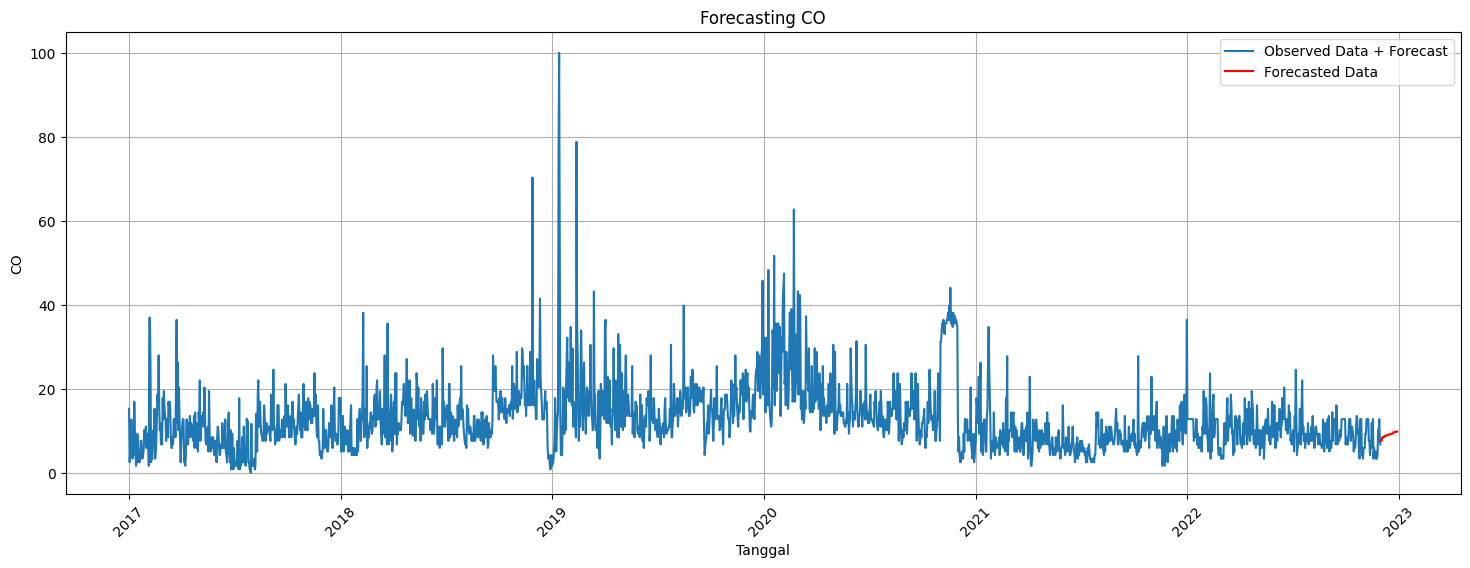

In [5]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


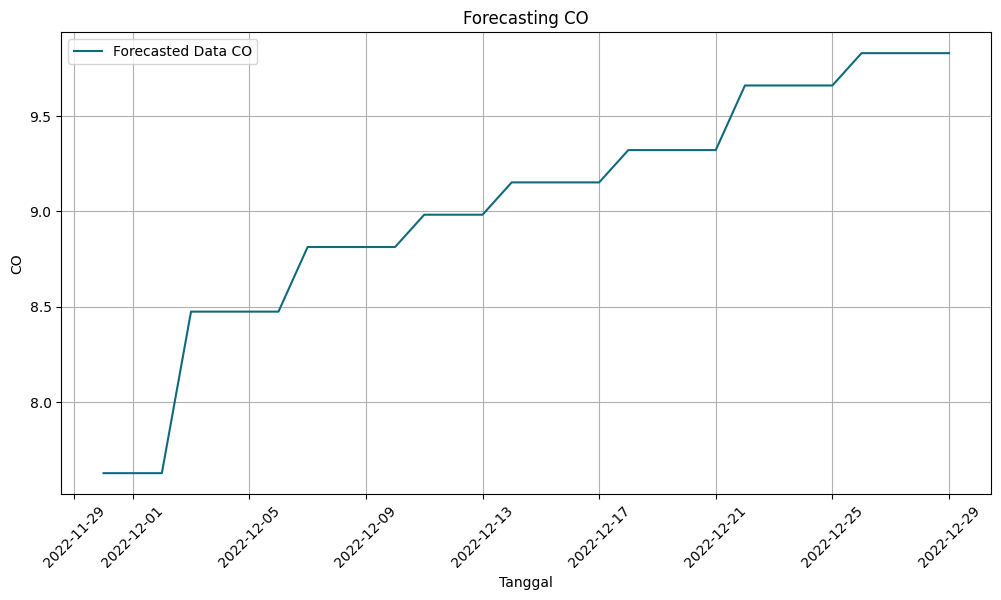

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data CO', color='#116A7B')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
# Menyimpan DataFrame ke dalam file Excel
#result_df.to_excel('C:/OBIE/Tel - U/SEM 7/PTA/BISMILLAH/Code/TA_COBA_KELM1/Forecasting/DKI3_CO_Forecast.xlsx', index=False)